In [109]:
# import libraries

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # Adjusts the connfiguration of the plots we will create

# read in the data

df = pd.read_csv(r'/Users/austinsmithers/Desktop/DataPortfolio/Python/data.csv')

In [47]:
# look at the data
df.head()

# NO = ID
# DEWP = Dew Point
# TEMP = Temperature
# PRES = Pressure
# cbwd = Combined Wind Direction
# Iws = Cumulated Wind Speed
# Is = Cumulated hours of snow
# Ir = Cumulated hours of rain
# pm2.5 = PM2.5 concentration (ug/m^3)

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [49]:
# Check for missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

No - 0.0%
year - 0.0%
month - 0.0%
day - 0.0%
hour - 0.0%
pm2.5 - 0.04716593647316539%
DEWP - 0.0%
TEMP - 0.0%
PRES - 0.0%
cbwd - 0.0%
Iws - 0.0%
Is - 0.0%
Ir - 0.0%


In [51]:
# Data Types for columns
df.dtypes

No         int64
year       int64
month      int64
day        int64
hour       int64
pm2.5    float64
DEWP       int64
TEMP     float64
PRES     float64
cbwd      object
Iws      float64
Is         int64
Ir         int64
dtype: object

In [ ]:
# Change Training_Intensity to an integer: df['Training_Intensity'] = df['Training_Intensity'].astype('int64')

In [ ]:
# Create new Column based on part of an old column: df['Intensity'] = df['Training_Intensity'].astype(str).str[:4]
# df

In [192]:
# Order data By Gross Revenue
df.sort_values(by=['year'], inplace=False, ascending=True).head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.000000,1021.000000,1,1.790000,0,0
5848,5849,2010,9,1,16,55.000000,18,27.000000,1013.000000,1,29.960000,0,0
5847,5848,2010,9,1,15,44.000000,19,27.000000,1013.000000,1,26.830000,0,0
5846,5847,2010,9,1,14,55.000000,19,27.000000,1014.000000,1,23.700000,0,0
5845,5846,2010,9,1,13,45.000000,19,25.000000,1014.000000,1,20.570000,0,0


In [59]:
# look at all of the data
pd.set_option('display.max_rows', None) #where None means no set limit on visible rows

In [61]:
# drop duplicates
newdf = df.groupby(['TEMP', 'year', 'PRES']).first() 
# drop duplicates on one column: df.['column'].drop.duplicates()sort_values(ascending=True)

In [ ]:
# hypothesis: Temperature, Pressure, and Dew Point will all be correlated.

<Axes: xlabel='TEMP', ylabel='PRES'>

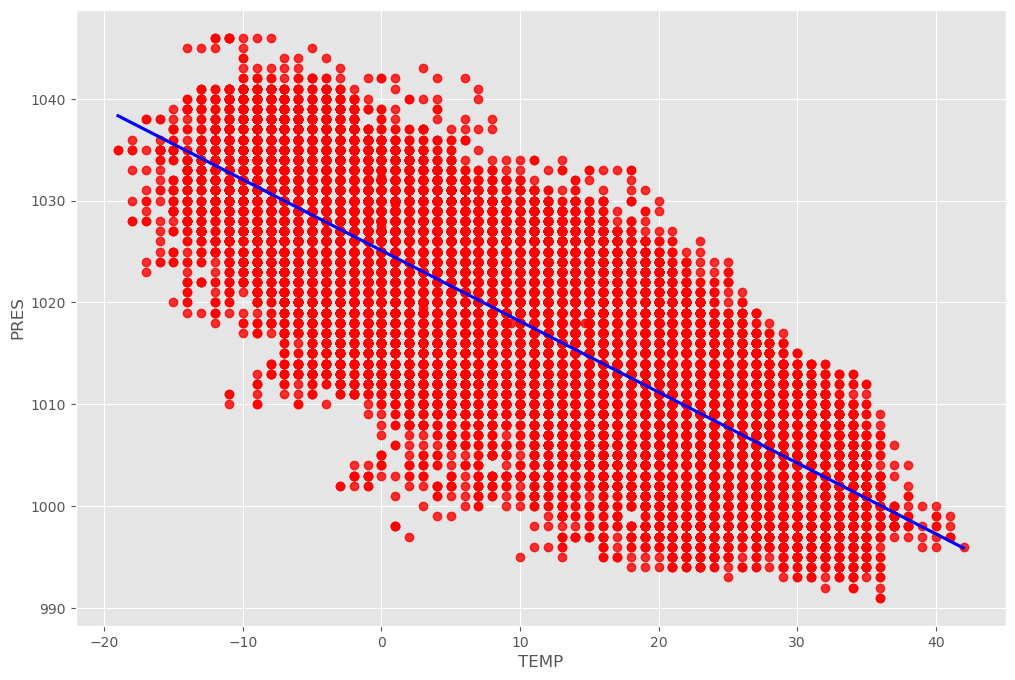

In [182]:
# scatter plot

sns.regplot(x="TEMP", y="PRES", data=df, scatter_kws={"color": "red"}, line_kws={"color":"blue"})


<Axes: xlabel='TEMP', ylabel='DEWP'>

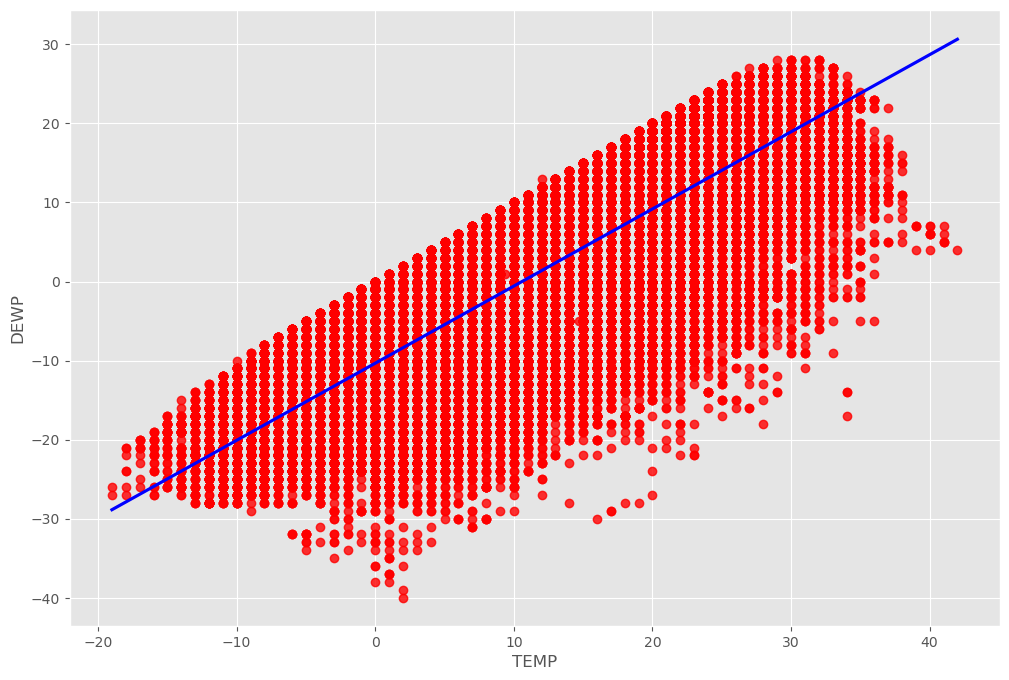

In [178]:
sns.regplot(x="TEMP", y="DEWP", data=df, scatter_kws={"color": "red"}, line_kws={"color":"blue"})


<Axes: xlabel='DEWP', ylabel='PRES'>

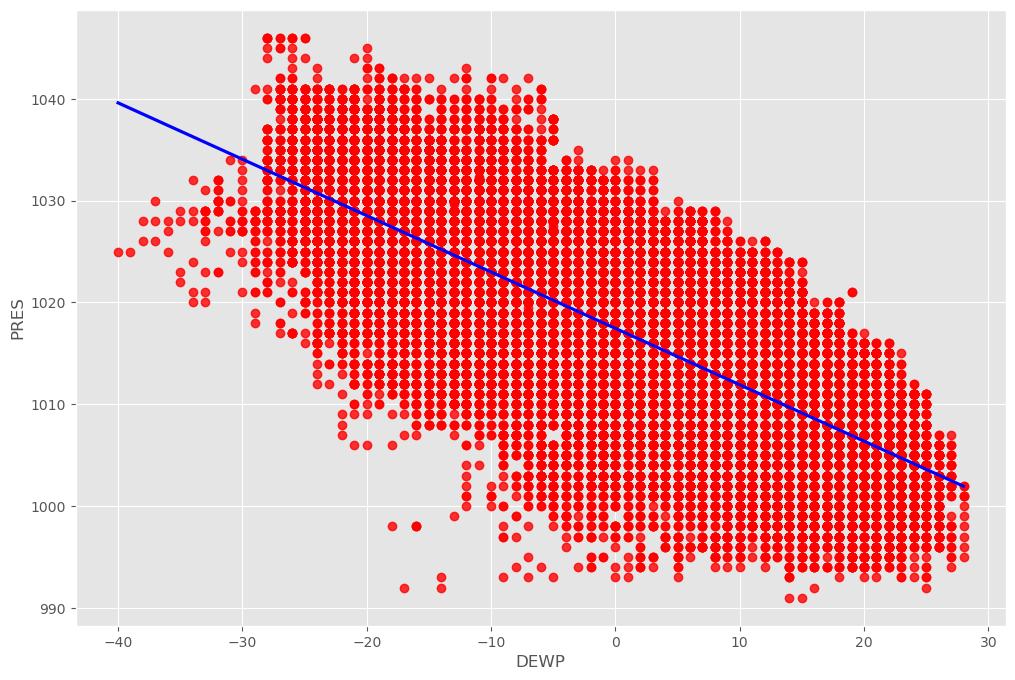

In [184]:
# scatter plot

sns.regplot(x="DEWP", y="PRES", data=df, scatter_kws={"color": "red"}, line_kws={"color":"blue"})


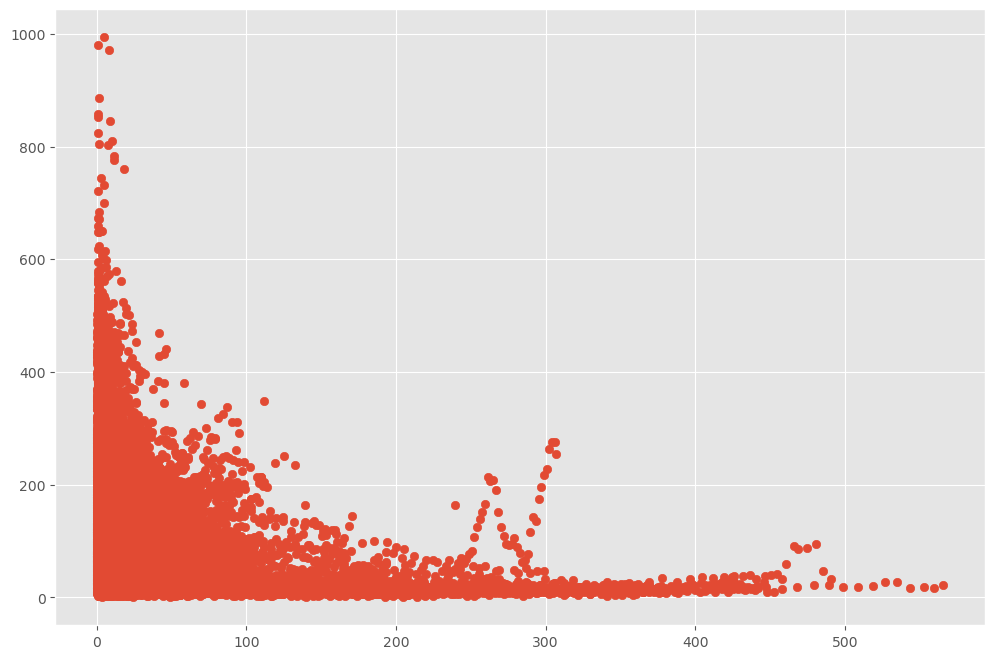

In [117]:
# hypothesis: pm2.5 will be (+) correlated with temperature, pressure and dewpoint, and (-) correlated with Iws, Ir, and Is

# scatter plot

plt.scatter(x=df['Iws'], y=df['pm2.5'])
plt.show()


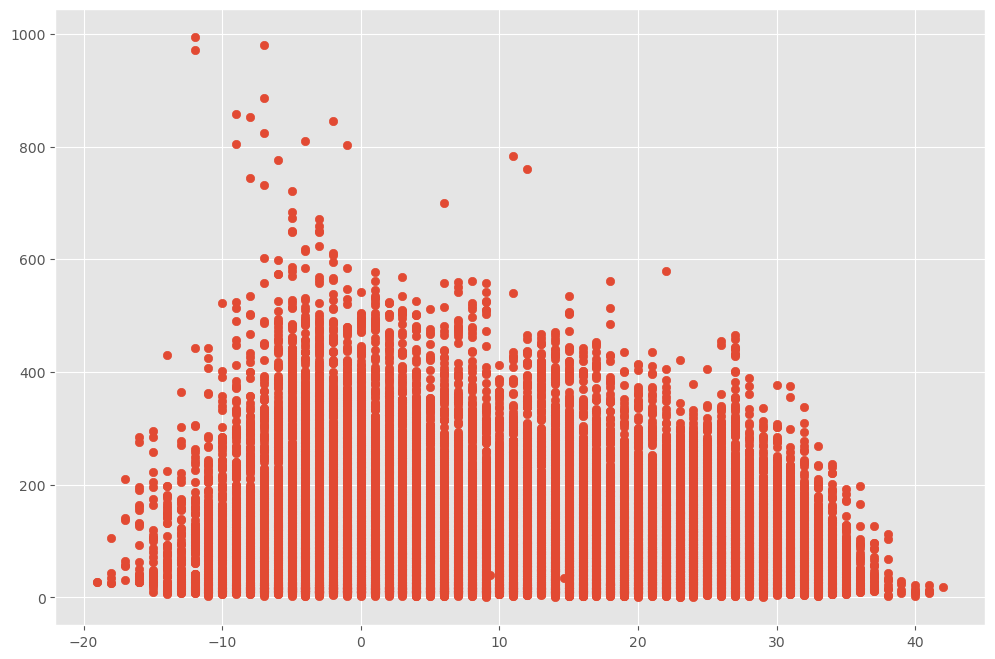

In [89]:
# scatter plot

plt.scatter(x=df['TEMP'], y=df['pm2.5'])
plt.show()

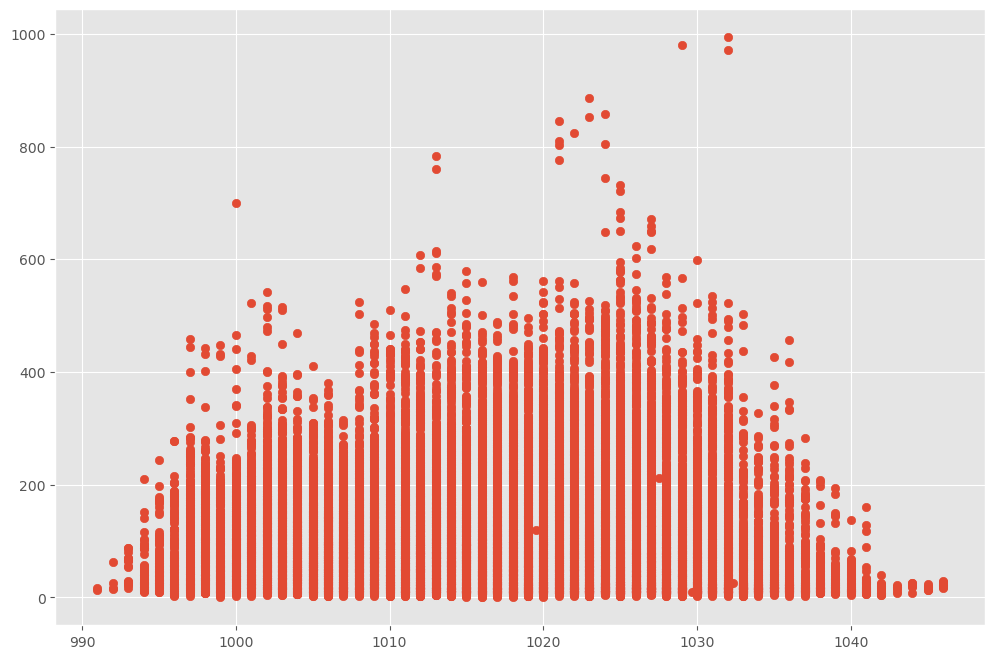

In [91]:
# scatter plot

plt.scatter(x=df['PRES'], y=df['pm2.5'])
plt.show()

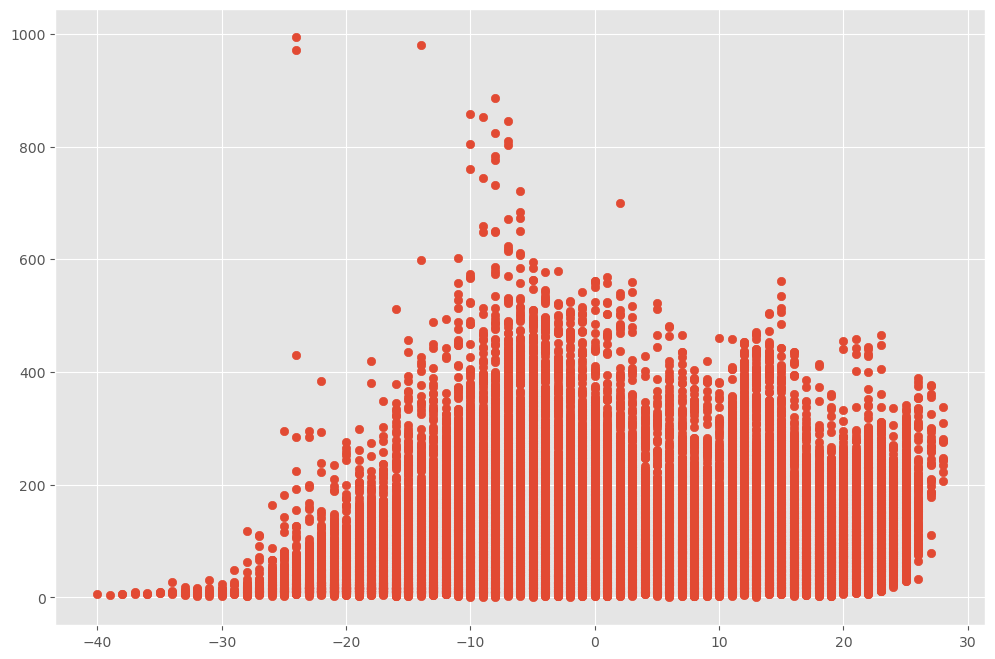

In [93]:
# scatter plot

plt.scatter(x=df['DEWP'], y=df['pm2.5'])
plt.show()

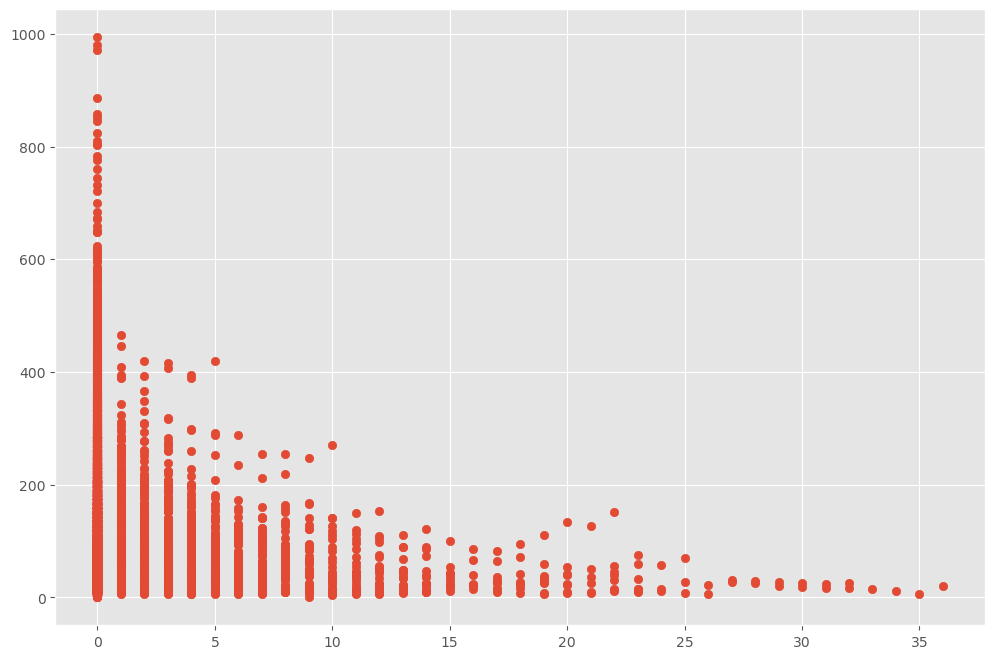

In [99]:
# scatter plot

plt.scatter(x=df['Ir'], y=df['pm2.5'])
plt.show()

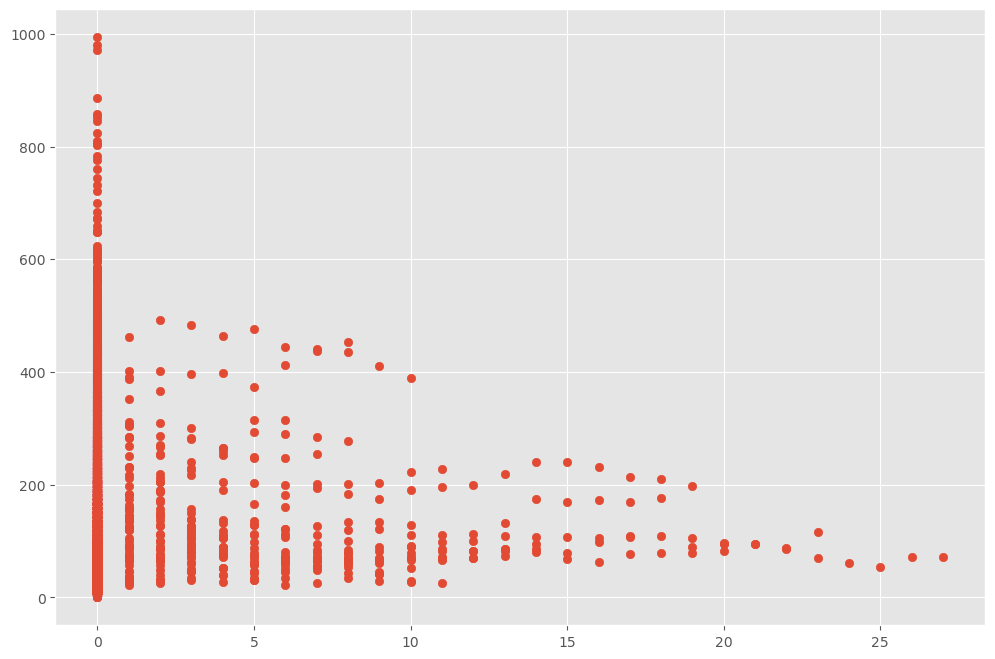

In [101]:
# scatter plot

plt.scatter(x=df['Is'], y=df['pm2.5'])
plt.show()

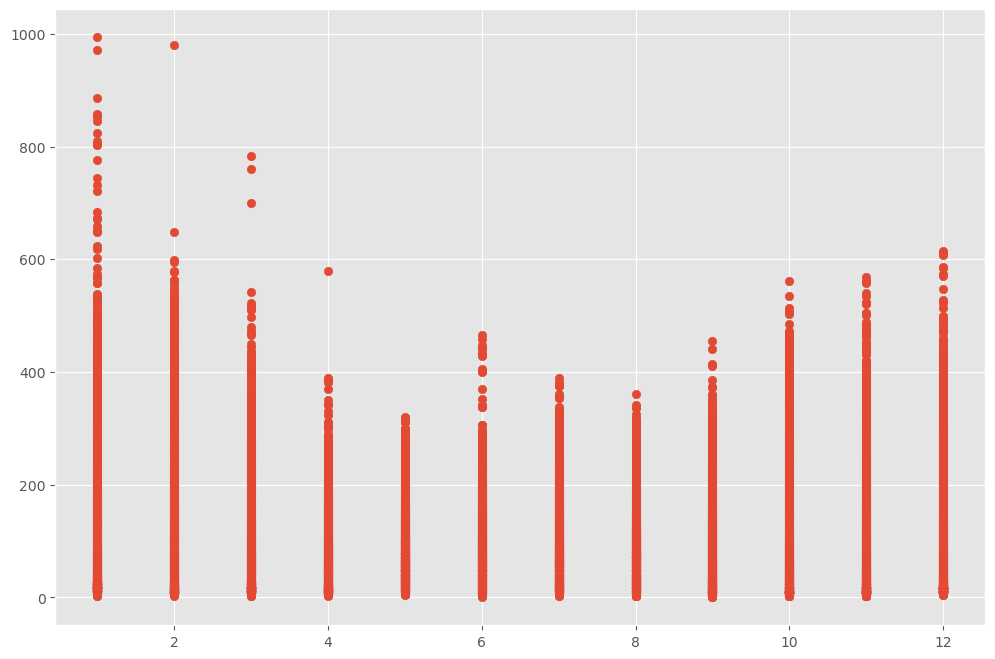

In [186]:
# scatter plot


plt.scatter(x=df['month'], y=df['pm2.5'])
plt.show()

In [166]:
df2 = df.loc[:, df.columns!="cbwd"]

df2.corr()

pd.options.display.float_format = '{:.6f}'.format


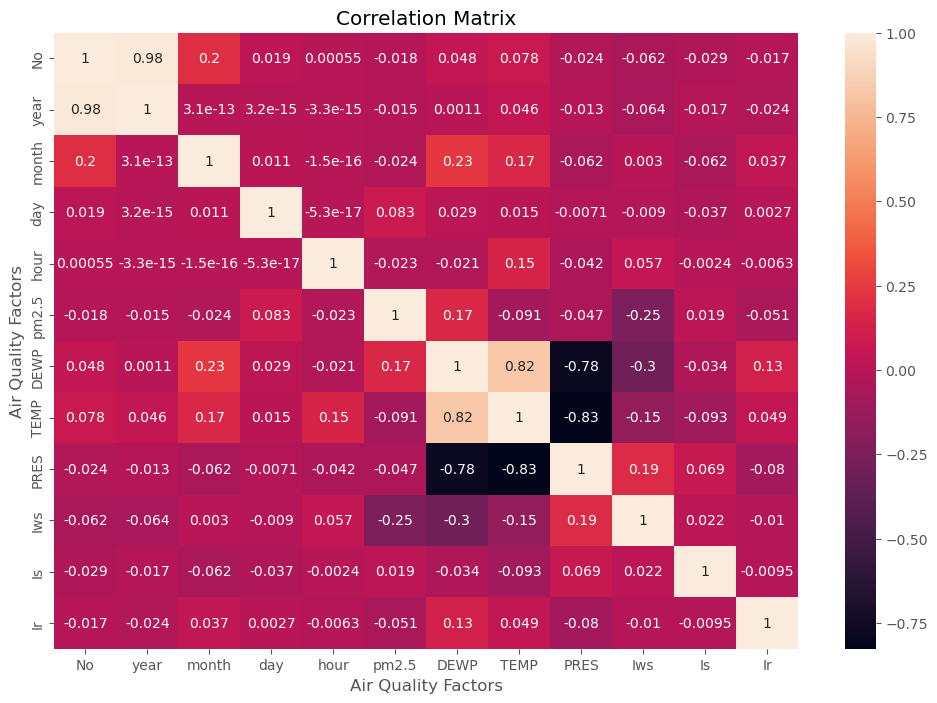

In [137]:
correlation_matrix = df2.corr()
sns.heatmap(correlation_matrix, annot=True)

plt.title("Correlation Matrix")
plt.xlabel("Air Quality Factors")
plt.ylabel("Air Quality Factors")
plt.show()

# high linear correlation between temperature and dew point.
# high linear correlation between temperature and pressure.
# high linear correlation between pressure and dew point.
# weak linear correlation between Iws and dew point.
# weak linear correlation between Iws and pm2.5.
# pm2.5 appears to have a strong non-linear relationship with Iws, Ir, Is, Temperature, Pressure, Dew Point, and Month.

In [143]:
df_numerized = df
for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

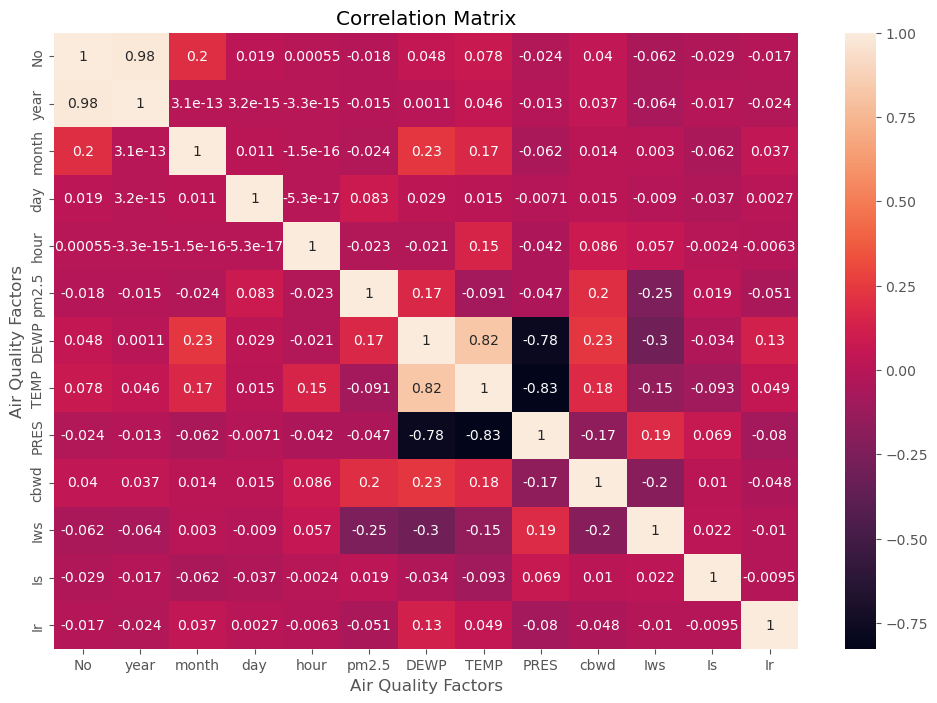

In [168]:
correlation_matrix = df_numerized.corr()
sns.heatmap(correlation_matrix, annot=True)

plt.title("Correlation Matrix")
plt.xlabel("Air Quality Factors")
plt.ylabel("Air Quality Factors")
plt.show()

In [164]:
df_numerized.corr()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
No,1.000000,0.979796,0.199301,0.018808,0.000547,-0.017706,0.047668,0.078159,-0.024224,0.039639,-0.062427,-0.029464,-0.016563
year,0.979796,1.000000,0.000000,0.000000,-0.000000,-0.014690,0.001122,0.045529,-0.012570,0.037459,-0.064244,-0.017002,-0.024383
month,0.199301,0.000000,1.000000,0.010796,-0.000000,-0.024069,0.233975,0.170093,-0.062185,0.013785,0.003043,-0.061672,0.036737
day,0.018808,0.000000,0.010796,1.000000,-0.000000,0.082788,0.028559,0.014791,-0.007070,0.014944,-0.008954,-0.036826,0.002681
hour,0.000547,-0.000000,-0.000000,-0.000000,1.000000,-0.023116,-0.020988,0.150066,-0.041928,0.085765,0.056618,-0.002374,-0.006286
pm2.5,-0.017706,-0.014690,-0.024069,0.082788,-0.023116,1.000000,0.171423,-0.090534,-0.047282,0.197150,-0.247784,0.019266,-0.051369
DEWP,0.047668,0.001122,0.233975,0.028559,-0.020988,0.171423,1.000000,0.824633,-0.778346,0.233170,-0.296399,-0.034410,0.125090
TEMP,0.078159,0.045529,0.170093,0.014791,0.150066,-0.090534,0.824633,1.000000,-0.826690,0.175916,-0.154623,-0.092601,0.049121
PRES,-0.024224,-0.012570,-0.062185,-0.007070,-0.041928,-0.047282,-0.778346,-0.826690,1.000000,-0.168963,0.185355,0.069028,-0.079843
cbwd,0.039639,0.037459,0.013785,0.014944,0.085765,0.197150,0.233170,0.175916,-0.168963,1.000000,-0.199964,0.010372,-0.048276


In [190]:
correlation_matrix = df_numerized.corr()
correlation_pairs = correlation_matrix.unstack()
sorted_pairs = correlation_pairs.sort_values()
sorted_pairs.head()

TEMP  PRES   -0.826690
PRES  TEMP   -0.826690
DEWP  PRES   -0.778346
PRES  DEWP   -0.778346
DEWP  Iws    -0.296399
dtype: float64

In [ ]:
#pm2.5 has the highest linear correlations with Iws, DEWP, and cbwd. These relationships are still relatively weak.